The cholera A content is 26.16 %
The cholera T content is 26.15 %
The cholera G content is 23.66 %
The cholera C content is 24.03 %
The cholera A-T content is 52.31 %
The cholera G-C content is 47.69 %


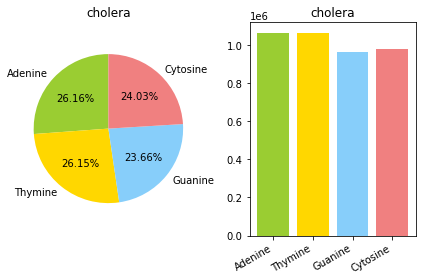

-----------------------------------------------------------------------
The corynebacterium-diphtheriae A content is 23.19 %
The corynebacterium-diphtheriae T content is 23.29 %
The corynebacterium-diphtheriae G content is 26.68 %
The corynebacterium-diphtheriae C content is 26.85 %
The corynebacterium-diphtheriae A-T content is 46.48 %
The corynebacterium-diphtheriae G-C content is 53.52 %


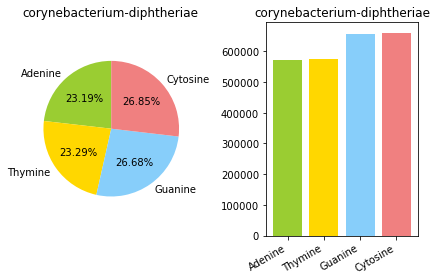

-----------------------------------------------------------------------
The COVID19 A content is 29.94 %
The COVID19 T content is 32.08 %
The COVID19 G content is 19.61 %
The COVID19 C content is 18.37 %
The COVID19 A-T content is 62.03 %
The COVID19 G-C content is 37.97 %


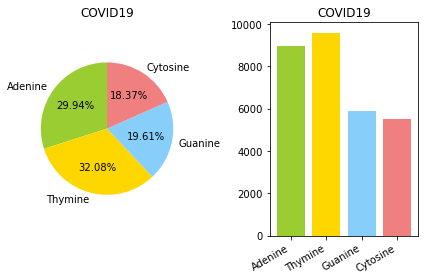

-----------------------------------------------------------------------
The ebola A content is 31.48 %
The ebola T content is 26.50 %
The ebola G content is 19.18 %
The ebola C content is 22.83 %
The ebola A-T content is 57.99 %
The ebola G-C content is 42.01 %


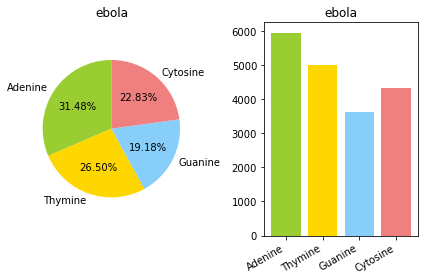

-----------------------------------------------------------------------
The MERS_COV A content is 26.18 %
The MERS_COV T content is 32.69 %
The MERS_COV G content is 20.91 %
The MERS_COV C content is 20.22 %
The MERS_COV A-T content is 58.87 %
The MERS_COV G-C content is 41.13 %


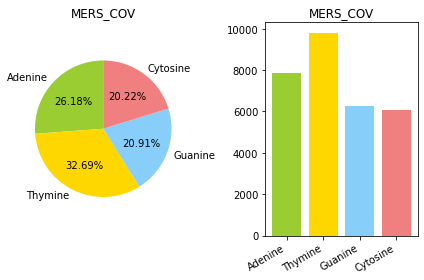

-----------------------------------------------------------------------
The SARS-COV A content is 28.51 %
The SARS-COV T content is 30.73 %
The SARS-COV G content is 20.80 %
The SARS-COV C content is 19.97 %
The SARS-COV A-T content is 59.24 %
The SARS-COV G-C content is 40.76 %


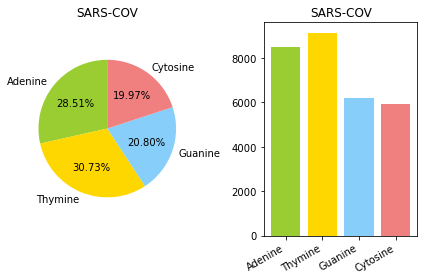

-----------------------------------------------------------------------
The SARS-COV2 A content is 29.94 %
The SARS-COV2 T content is 32.08 %
The SARS-COV2 G content is 19.61 %
The SARS-COV2 C content is 18.37 %
The SARS-COV2 A-T content is 62.03 %
The SARS-COV2 G-C content is 37.97 %


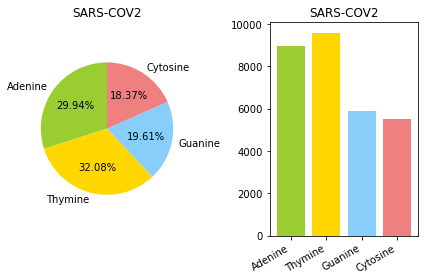

-----------------------------------------------------------------------


In [1]:
import os
import glob2
import matplotlib.pyplot as plt
import numpy as np

clear = lambda: os.system('cls')  # On Windows System
clear()

genomes = glob2.glob("Genomes/*.txt") # stores the 7 txt files into this object

if len(genomes) > 0: # make sure that genomes is not empty
    for i in range(len(genomes)) : # for the amount of files in the folder do the following:
        temp = open(genomes[i])  # open the file(s) in Genomes folder and assign it to temporary object called "temp"

        '''
        Each text file is saved as for example: 
        Genomes\\cholera.txt, so we remove ".", "txt", "\\", and "Genomes" and what is
        left over is the actual specimen name. To accomplish this we have assigned 
        the long form name "Genomes\\cholera.txt" to temp and then assign to
        genomeName and do the cleaning. At the end we are left with cholera for cholera.
        '''

        genomeName = temp.name  # sure
        genomeName = genomeName.replace(".", "") # the following .replace() are used to format my print statements (make look pretty)
        genomeName = genomeName.replace("txt", "")
        genomeName = genomeName.replace("\\", "")  # Needs an extra forward slash, too much to explain
        genomeName = genomeName.replace("Genomes", "")
        temp = temp.read() # need to read file as well to perform operations
        genome_upper = temp.upper() # ensures all letters are uppercase

        '''
        Now we count the 4 nucleotide bases in the genome_upper object
        and assign A, T, G, and C to a respective variable        
        '''

        current_genome_A = genome_upper.count('A')
        current_genome_T = genome_upper.count('T')
        current_genome_G = genome_upper.count('G')
        current_genome_C = genome_upper.count('C')

        if (current_genome_A | current_genome_T | current_genome_G | current_genome_C) == 0:
            print("Error in counts. One of them are empty") # make sure that none of the nucleotide bases are non-empty
        else:
            # calculate the total length of the respective genome
            length_genome = current_genome_A + current_genome_T + current_genome_G + current_genome_C

            current_genome_A_per = ((current_genome_A / length_genome) * 100) # calculate total Adenine percentage in the respective genome
            current_genome_T_per = (current_genome_T / length_genome) * 100 # calculate the total Thymine percentage in the respective genome
            current_genome_G_per = (current_genome_G / length_genome) * 100 # calculate the total Guanine percentage in the respective genome
            current_genome_C_per = (current_genome_C / length_genome) * 100 # calculate the total Cytosine percentage in the respective genome
            current_genome_AT_per = ((current_genome_A + current_genome_T) / length_genome) * 100 # calculate the A-T base-pair percentage in the respective genome
            current_genome_GC_per = ((current_genome_G + current_genome_C) / length_genome) * 100 # calculate the G-C base-pair percentage in the respective genome


            if (current_genome_A_per or current_genome_T_per or current_genome_G_per or current_genome_C_per or current_genome_AT_per or current_genome_GC_per) == 0: # another precaution placed; though it isn't working, is it due to floating point arithmetic?
                print("Error in percentage calculations")
            else:
                # printing the percentages as print statements in the console
                print("The %s A content is %5.2f %%" % (genomeName, current_genome_A_per))
                print("The %s T content is %5.2f %%" % (genomeName, current_genome_T_per))
                print("The %s G content is %5.2f %%" % (genomeName, current_genome_G_per))
                print("The %s C content is %5.2f %%" % (genomeName, current_genome_C_per))
                print("The %s A-T content is %5.2f %%" % (genomeName, current_genome_AT_per))
                print("The %s G-C content is %5.2f %%" % (genomeName, current_genome_GC_per))
                # print("-----------------------------------------------------------------------") # we have a separation line
                
                '''
                The code below will generate pie and bar charts for each respective genome in the folder                
                '''
                
                fig = plt.figure()
                ax1 = fig.add_subplot(121)

                labels = 'Adenine', 'Thymine', 'Guanine', 'Cytosine'
                colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
                sizes = [current_genome_A_per, current_genome_T_per, current_genome_G_per, current_genome_C_per]
                explode = (0, 0, 0, 0)

                ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
                        autopct='%0.2f%%', shadow=False, startangle= 90)
                plt.axis('equal')
                plt.title(genomeName)
                # plt.show()

                ax2 = fig.add_subplot(122)
                height = [current_genome_A, current_genome_T, current_genome_G, current_genome_C]
                bars = ('Adenine', 'Thymine', 'Guanine', 'Cytosine')
                y_pos = np.arange(len(bars))
                ax2.bar(y_pos, height, color = colors, label = labels)
                plt.xticks(y_pos, bars)
                fig.autofmt_xdate()
                plt.title(genomeName)
                fig.tight_layout()
                plt.show()
                print("-----------------------------------------------------------------------")
else:
    print("something's not working")